# Autoencoders

Type of neural network which typically aims to learn efficient representations (efficient coding) of the data.
Usually autoencoders are trained in an unsupervised manner.


### Applications
1. Anomaly detection
2. Dimensionality reduction
3. Denoising
4. ...

**Reconstruction**
![Autoencoder](images/autoencoder-architecture.png)
Source: https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

**Denoising**
![denoising](images/denoising_mnist.png)
Source: https://www.kaggle.com/tarunkr/autoencoder-denoising-image-mnist-cifar10

## Technical imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
# %matplotlib notebook

## Data

First, let's have a look on the data. They are MNIST dataset - the same as last week.

In [3]:
from torchvision import transforms
from torchvision.datasets import MNIST, FashionMNIST

In [4]:
_DATASETS_PATH = 'data' # path to directory where data are to be stored

torchvision library allows to easily download some of the most popular datasets

In [5]:
transform = transforms.ToTensor()

In [6]:
mnist_train = MNIST(_DATASETS_PATH, train=True, download=True, transform=transform);
mnist_test = MNIST(_DATASETS_PATH, train=False, download=True, transform=transform);

Let's see what the data look like

In [7]:
img, target = mnist_train[0]
print(f'image type: {type(img)}, image shape: {img.shape}, target: {target}, target class name: {mnist_train.classes[target]}')

image type: <class 'torch.Tensor'>, image shape: torch.Size([1, 28, 28]), target: 5, target class name: 5 - five


The image is a torch.Tensor object, and the target an integer. Notice that the image has 3 dimensions: single channel and 28 height x 28 width \
In order to visualize it correctly, we need to reduce it to 2 dimensional  height x width tensor

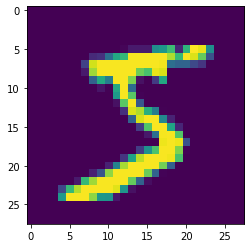

In [8]:
plt.imshow(img[0])

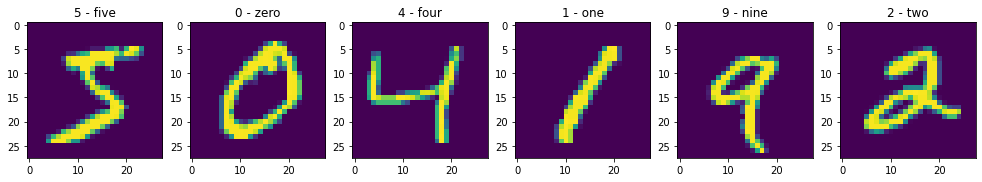

In [9]:
num_images = 6
fig, axs = plt.subplots(ncols=num_images, figsize=(17,5))
for i in range(num_images):
    img, target = mnist_train[i]
    axs[i].imshow(img[0])
    axs[i].set_title(f'{mnist_train.classes[target]}')
    
    

## Model

In [10]:
import torch
from torch import nn

### Encoder

#### Your task: write encoder class with single hidden layer

Let's start with fully-connected model, i. e. perceptron.
1. As the input, model should take 1d vector with of 28x28 length (number of pixels)
2. Number of neurons in hidden layer should be an argument of constructor (`__init__` function)
3. The same applies to the number of latent space dimesions 

In [11]:
class Encoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        #your code here
        ...
        

    def forward(self, x):
        #your code here
        ...
        return ...

Try it:

In [13]:
#prepare data
img, target = mnist_train[0]
img = img.view(-1)
print('image shape:', img.shape)

image shape: torch.Size([784])


In [14]:
# prepare encoder
hidden_dim = 64
latent_dim = 12
encoder = Encoder_1hl(hidden_dim, latent_dim)

In [15]:
# compute representation in latent space
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
with torch.no_grad(): #turn off gradient
    z = encoder(batch)
print('output shape:', z.shape)

batch shape: torch.Size([1, 784])
output shape: torch.Size([1, 12])


### Decoder

In [16]:
class Decoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 28*28),
            nn.Sigmoid() # sigmoid function transforms input values (-inf, +inf) to output in range (0, 1)
            )
            

    def forward(self, x):
        x = self.net(x)
        return x

### Autoencoder = Encoder + Decoder

Let's put it all together.

#### Your task: write autoencoder class

Encoder and decoder should have 1 hidden layer each

In [17]:
class Autoencoder_1hl(nn.Module):
    def __init__(self, hidden_dim, latent_dim):
        """
        hidden_dim: number of neurons in the hidden layer
        latent_dim: number of latent space dimensions
        """
        super().__init__()
        # your code here
        ...
            
    def forward(self, x):
        # your code here
        ...
        return ...

In [19]:
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)

In [20]:
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
with torch.no_grad(): #turn off gradient
    x_hat = autoencoder(batch)
print('output shape:', x_hat.shape)

batch shape: torch.Size([1, 784])
output shape: torch.Size([1, 784])


So far, the model operates on flatten images. Yet everywhere else we prefer to operate on 1x28x28 images. Let's modify the `forward` function to do the reshaping

In [21]:
class Autoencoder_1hl(nn.Module):
    
    # paste your __init__ function here

    def forward(self, x):
        input_shape = x.shape #batch_size, channels, height, width
        x = x.view(input_shape[0], -1)
        
        # paste the rest of your forward function here
        
        return x.view(input_shape)


Try the new model

In [23]:
img, target = mnist_train[0]
batch = img.unsqueeze(0) #model operates on batched input. Let's create batch with one sample
print('batch shape:', batch.shape)
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)
with torch.no_grad(): #turn off gradient
    x_hat = autoencoder(batch)
print('output shape:', x_hat.shape)

batch shape: torch.Size([1, 1, 28, 28])
output shape: torch.Size([1, 1, 28, 28])


#### Visualize

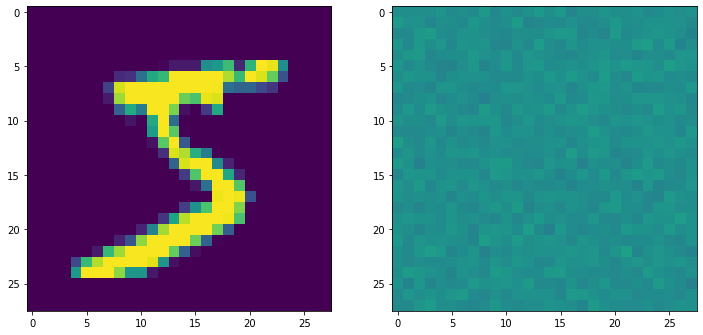

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.imshow(batch[0,0], vmin=0, vmax=1)
ax2.imshow(x_hat[0,0], vmin=0, vmax=1)

## Training

Prepare dataloaders

In [25]:
from torch.utils.data import DataLoader

In [26]:
batch_size = 128

In [27]:
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

Closer look on dataloaders

In [28]:
x, y = next(iter(mnist_train_dataloader))
print(f'x shape: {x.shape}')
print(f'target shape: {y.shape}')
print(f'target: {y}')

x shape: torch.Size([128, 1, 28, 28])
target shape: torch.Size([128])
target: tensor([7, 5, 3, 6, 6, 4, 9, 6, 1, 2, 7, 9, 6, 9, 6, 7, 7, 6, 8, 7, 0, 9, 3, 3,
        1, 9, 2, 3, 1, 7, 0, 2, 8, 5, 1, 3, 6, 7, 8, 0, 5, 8, 2, 6, 6, 6, 8, 6,
        6, 9, 2, 5, 7, 3, 2, 3, 7, 9, 1, 7, 1, 7, 8, 0, 6, 0, 6, 8, 5, 4, 0, 3,
        5, 3, 1, 7, 6, 3, 3, 2, 6, 6, 8, 0, 0, 6, 0, 2, 9, 7, 2, 0, 3, 4, 4, 5,
        0, 8, 4, 5, 1, 9, 9, 0, 1, 9, 6, 8, 6, 8, 9, 8, 4, 6, 6, 4, 9, 5, 8, 0,
        5, 6, 6, 8, 1, 2, 2, 2])


### Schema of training in PyTorch

Set model, optimizer (which performs optimizing steps) and criterion
```
model = ...
optimizer =  torch.optim.AdamW(model.parameters(), lr=1e-3)
criterion = ... #function which computes loss
```

Set device on which computations will be done: 'cpu' or 'cuda' (GPU)
```
device = 'cuda' if torch.cuda.is_available() else 'cpu' # if your machine supports cuda, it wil be used for computation
```

set model to 'train' mode and allocate it to the device
```
model.train().to(device);
```

Schema for single epoch training:
```
for x, y in mnist_train_dataloader:    
    # clear gradient from previous step
    optimizer.zero_grad()
    
    x = x.to(device)
    x_hat = model(x)
    loss = criterion(x, x_hat)

    # compute accumulated gradients
    loss.backward()

    # perform parameter update based on current gradients
    optimizer.step()
 ```

### Your task
write training loop for 10 epochs for autoencoder. Set criterion to mean square root error `nn.MSELoss()`

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # if your machine supports cuda, it wil be used for computation
autoencoder.to(device).train();
optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=1e-3)
criterion = nn.MSELoss() 

Check batches from dataloader

In [30]:
x, y = next(iter(mnist_train_dataloader))

Check x_hat computation step

In [31]:
x_hat = autoencoder(x.to(device))

Check loss computation

In [32]:
loss = criterion(x.to(device), x_hat)

Now, write the training loop:

In [ ]:
num_epochs = 2 #first let's do a short training, to see if the loss go down

history = [] #save losses from each epoch
for i_epoch in range(num_epochs):
    epoch_losses = []
    
    # your code here
    # ...
    # epoch_loss = ...
    
    print(f'epoch {i_epoch}, loss: {epoch_loss:0.4f}')
    history.append({'loss': epoch_loss})

Having small loss on training is good, but we really want the model to generalize for unseen samples. Let's calculate loss on test dataset after each epoch

#### Your task
Write function which calculates loss of the model on test dataset

In [ ]:
@torch.no_grad() #this decorator disable gradient computation in function. Nicer than `with torch.no_grad():`
def evaluate_model(model, dataloader, criterion):
    # your code here
    # ...
    # final_loss = ...
    return final_loss

Test if your function works

In [118]:
test_loss = evaluate_model(autoencoder, mnist_test_dataloader)
print(f'test loss: {test_loss:0.4f}')

test loss: 0.0639


Now we are ready to implement testset evaluation and do the proper traing of the model. For clarity, let's create a fresh autoencoder

In [123]:
hidden_dim = 64
latent_dim = 12
autoencoder = Autoencoder_1hl(hidden_dim, latent_dim)
autoencoder.to(device).train();

optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=1e-3)

In [124]:
num_epochs = 10

history = [] #save losses from each epoch
for i_epoch in range(num_epochs):
    epoch_losses = []
    for batch in mnist_train_dataloader:
         # clear gradient from previous step
        optimizer.zero_grad()
        
        x, y = batch
        x = x.to(device)
        x_hat = autoencoder(x)
        loss = criterion(x, x_hat)
        
        # compute accumulated gradients
        loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # save loss
        epoch_losses.append(loss.item()) #'item()' gets number from tensor. Similarly 'numpy()' returns numpy array copy of the tensor
        
        
    epoch_loss = np.mean(epoch_losses)
    test_loss = evaluate_model(autoencoder, mnist_test_dataloader, criterion)
    autoencoder.train() # if "evaluate_model" switches the model to 'eval' mode, switch it back 'train'
    print(f'epoch {i_epoch}, train loss: {epoch_loss:0.4f}, test loss {test_loss:0.4f}')
    history.append({'train loss': epoch_loss, 'test loss': test_loss})
        

epoch 0, train loss: 0.0603, test loss 0.0363
epoch 1, train loss: 0.0318, test loss 0.0279
epoch 2, train loss: 0.0264, test loss 0.0243
epoch 3, train loss: 0.0240, test loss 0.0229
epoch 4, train loss: 0.0230, test loss 0.0221
epoch 5, train loss: 0.0223, test loss 0.0214
epoch 6, train loss: 0.0216, test loss 0.0209
epoch 7, train loss: 0.0212, test loss 0.0204
epoch 8, train loss: 0.0208, test loss 0.0202
epoch 9, train loss: 0.0205, test loss 0.0200


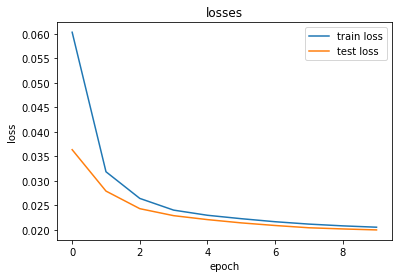

In [125]:
plt.plot([entry['train loss'] for entry in history], label='train loss')
plt.plot([entry['test loss'] for entry in history], label='test loss')
plt.title('losses');
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

For inference on small samples, we can use CPU - it allows to not care about 'cuda' stuff. If the models or images are large, better stay with GPU.

In [126]:
autoencoder.to('cpu').eval();

In [127]:
def reconstruct_image(img, model):
    with torch.no_grad():
        return model(img.unsqueeze(0))[0]

In [128]:
img, target = mnist_test[0]
reconstruction = reconstruct_image(img, autoencoder)

In [129]:
autoencoder.cpu();

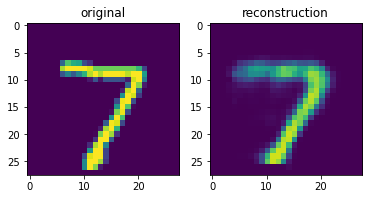

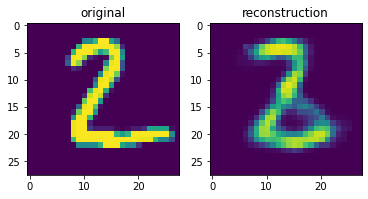

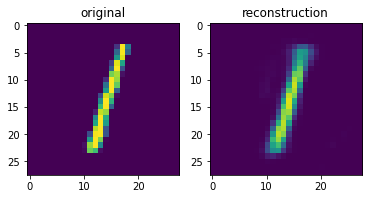

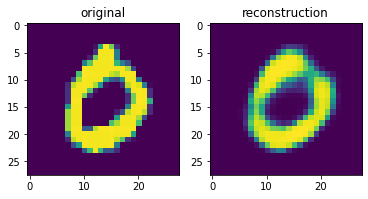

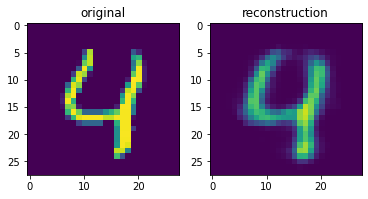

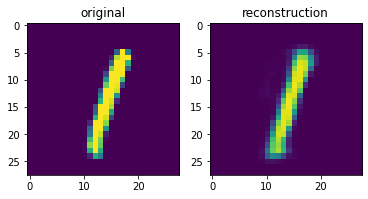

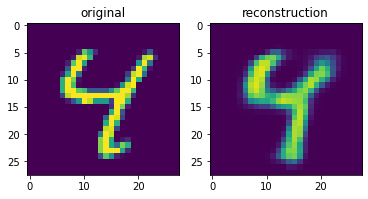

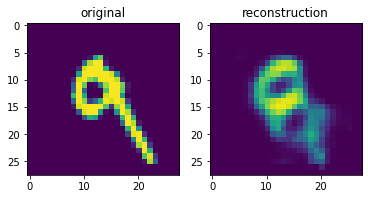

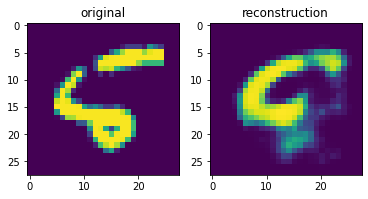

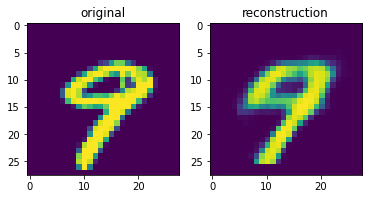

In [130]:
for i in range(10):
    img, target = mnist_test[i]
    reconstruction = reconstruct_image(img, autoencoder)
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title('original')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('reconstruction')

## Reconstruction errors and outliers
Autoencores may be used to detect outliers. Rare events tend to be poorly reconstructed by the model

In [131]:
reconstruction_errors= []

# criterion gives us single loss for batch. Here the result is a vector of distances, one for each image
# equivalent to nn.functional.mse_loss(x, x_hat, reduction='none')
def distance_function(x, x_hat):
    return torch.mean((x-x_hat)**2, dim=(1, 2, 3))

autoencoder.to(device);
for x, y in mnist_test_dataloader:
    x = x.to(device)
    x_hat = autoencoder(x.to(device))
    errors = distance_function(x, x_hat)
    reconstruction_errors.extend([el.item() for el in errors])

(array([1.462e+03, 2.754e+03, 2.847e+03, 1.776e+03, 7.610e+02, 2.620e+02,
        1.000e+02, 2.900e+01, 7.000e+00, 2.000e+00]),
 array([0.00172727, 0.00936957, 0.01701187, 0.02465418, 0.03229648,
        0.03993878, 0.04758108, 0.05522338, 0.06286568, 0.07050799,
        0.07815029]),
 <BarContainer object of 10 artists>)

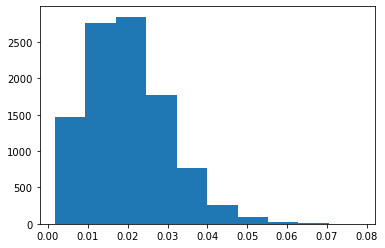

In [132]:
plt.hist(reconstruction_errors);

In [133]:
autoencoder.to('cpu');

Some of the worst cases..

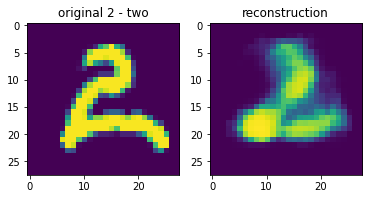

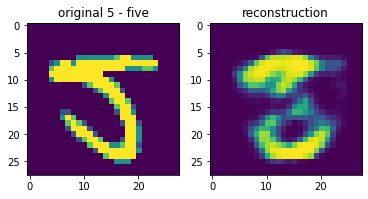

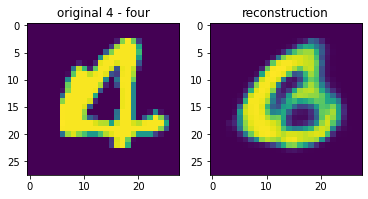

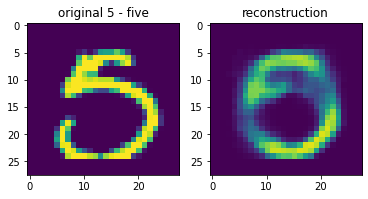

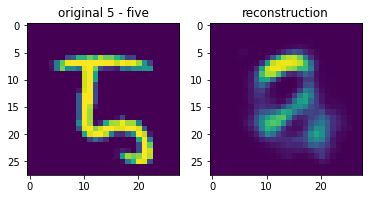

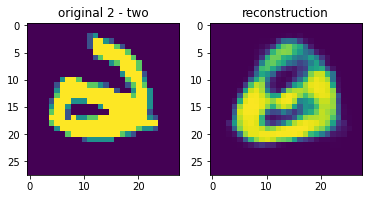

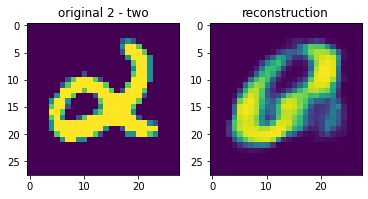

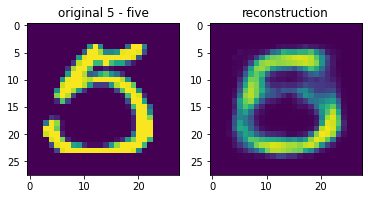

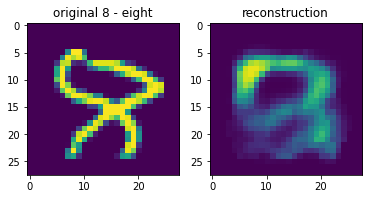

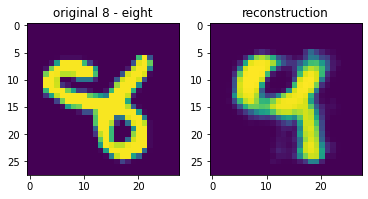

In [134]:
for idx in np.argsort(reconstruction_errors)[-10:]:
    img, target = mnist_test[idx]
    reconstruction = reconstruct_image(img, autoencoder)
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title(f'original {mnist_test.classes[target]}')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('reconstruction')

In [135]:
labels = np.array([x[1] for x in mnist_test])

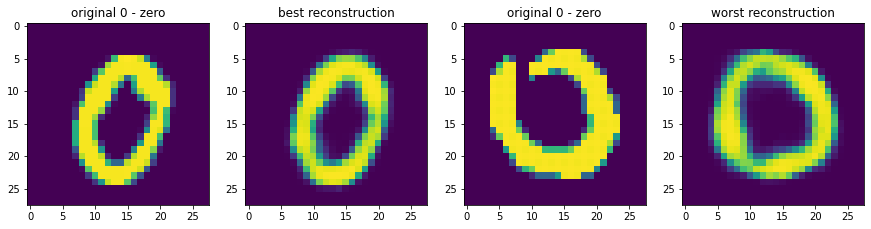

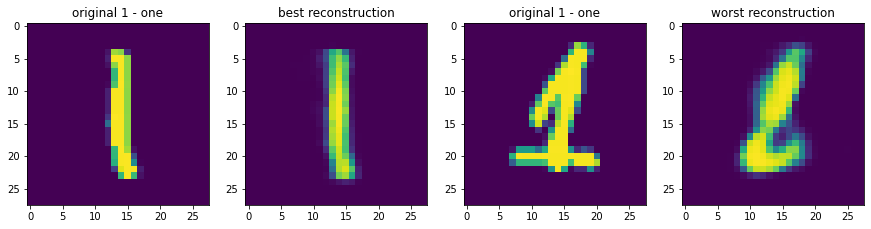

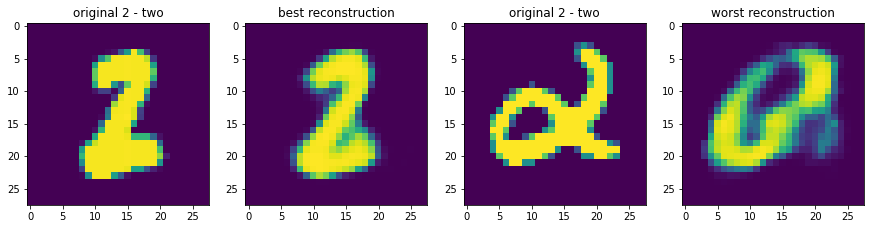

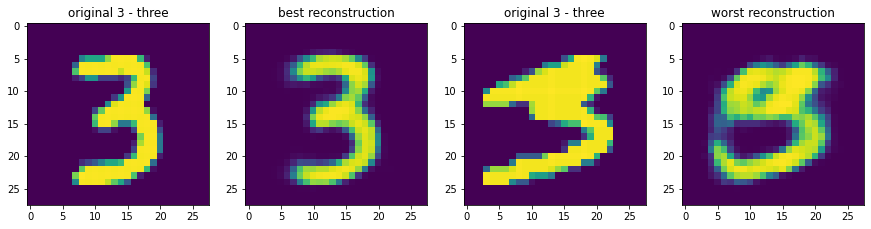

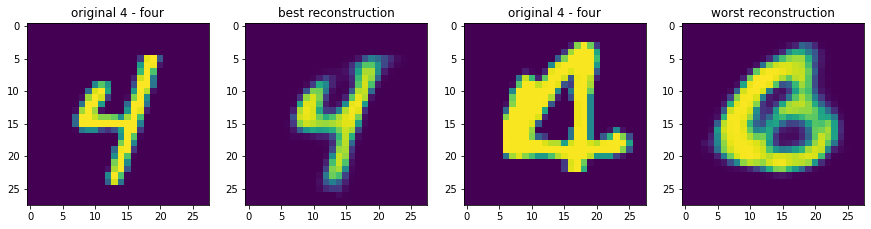

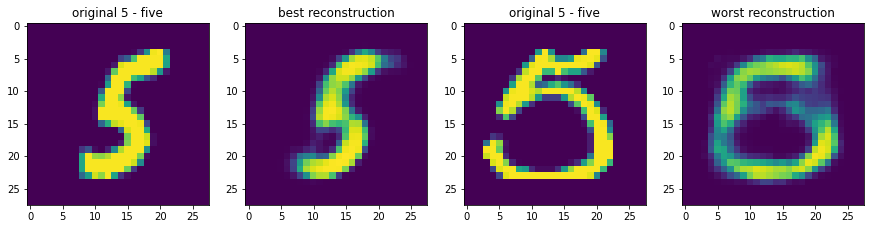

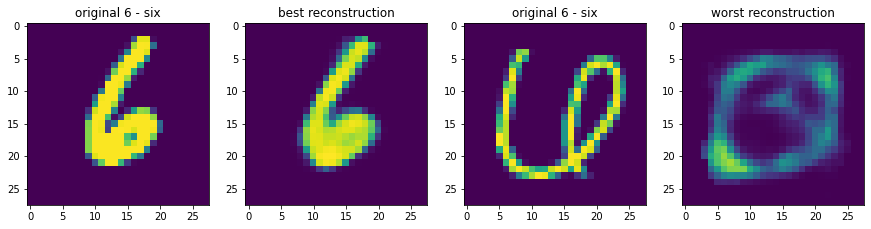

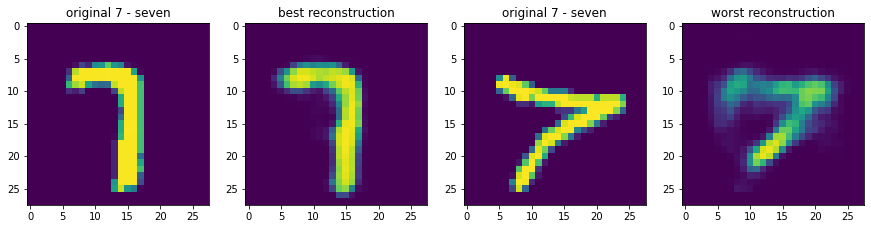

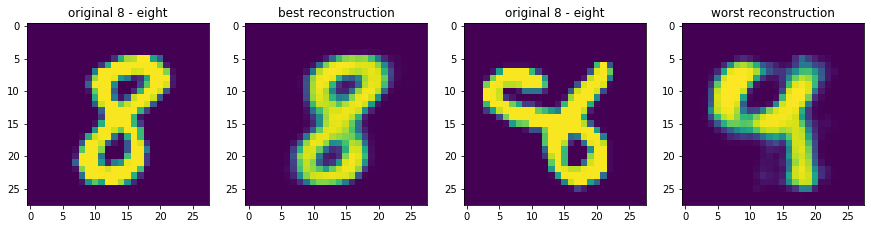

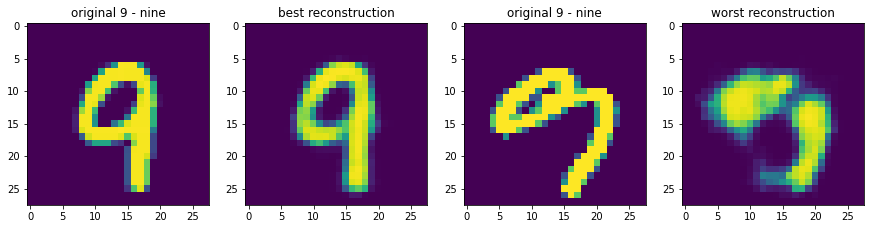

In [136]:
reconstruction_errors = np.array(reconstruction_errors)
for digit in range(10):
    digit_indices = np.where(labels==digit)[0]
    idx_best = digit_indices[np.argmin(reconstruction_errors[digit_indices])]
    idx_worst = digit_indices[np.argmax(reconstruction_errors[digit_indices])]
    fig, axs = plt.subplots(ncols=4, figsize=(15, 6))
    
    img, target = mnist_test[idx_best]
    reconstruction = reconstruct_image(img, autoencoder)
    axs[0].imshow(img[0], vmin=0, vmax=1)
    axs[0].set_title(f'original {mnist_test.classes[target]}')
    axs[1].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[1].set_title('best reconstruction')
    
    img, target = mnist_test[idx_worst]
    reconstruction = reconstruct_image(img, autoencoder)
    axs[2].imshow(img[0], vmin=0, vmax=1)
    axs[2].set_title(f'original {mnist_test.classes[target]}')
    axs[3].imshow(reconstruction[0], vmin=0, vmax=1)
    axs[3].set_title('worst reconstruction')

## Task: Anomaly detection

Autoencoders are often used in anomaly detection. In such application, the model is train on 'normal' dataset, learning to  compressed representations typical objects. When feeding with untypical sample, the autoencoder is expected to reconstruct object much worse, therefore the reconstrution error should be much larger. 

Now we will try to distinguish letters from digits. For the letters sample we will use EMNIST is dataset (similar to MNIST, but apart from digits it contains letters). We intend to compare reconstruction errors on digits and letters.

In [48]:
from torchvision.datasets import EMNIST

In [74]:
emnist_test = EMNIST(_DATASETS_PATH, split='letters', train=False, download=True, transform=transforms.ToTensor());
print(emnist_test.classes)

['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Let's look at some letter examples:

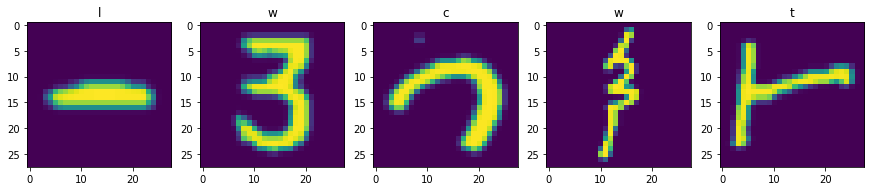

In [137]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
for i, idx in enumerate(np.random.choice(np.arange(len(emnist_test)), 5)):
    img, target = emnist_test[idx]
    axs[i].imshow(img[0], vmin=0, vmax=1)
    axs[i].set_title(emnist_test.classes[target]);

It is clear, that the letters are rotated and mirrored. For out purpose it doesn't matter. If you care, use `img[0].T` for displaying or change dataset transform to `transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda img: img.transpose(1, 2))])`

#### Your task
Compute reconstruction errors for 1000 digits and 1000 letters.

In [ ]:
def calc_reconstruction_error(x, model):
    # your code here
    # ...
    # reconstruction_error = ...
    # return reconstruction_error

Tip: rember to use torch.no_grad() and set the same device for model and data

In [138]:
digit_indices = np.random.choice(np.arange(len(mnist_test)), 1000)
letter_indices = np.random.choice(np.arange(len(emnist_test)), 1000)

In [93]:
digits_reconstruction_errors= []
autoencoder = autoencoder.eval().to(device)
for idx in digit_indices:
    # your code here
    # ...
    # reconstruction_error = ...
    digits_reconstruction_errors.append(reconstruction_error)    

In [97]:
letters_reconstruction_errors= []
# your code here

Visualize the results:

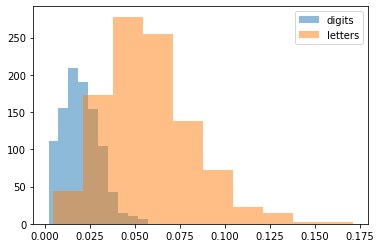

In [142]:
plt.hist(digits_reconstruction_errors, alpha=0.5, label='digits');
plt.hist(letters_reconstruction_errors, alpha=0.5, label='letters');
plt.legend();

Short analysis of result

In [143]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, roc_auc_score

In [144]:
df = pd.DataFrame([{'class': 0, 'error': x} for x in digits_reconstruction_errors] + [{'class': 1, 'error': x} for x in letters_reconstruction_errors])
df.sample(10)

,class,error
370,0,0.015575
518,0,0.018205
15,0,0.004030
1588,1,0.018584
1017,1,0.047165
1768,1,0.051938
283,0,0.014240
1700,1,0.034049
93,0,0.016500
975,0,0.018150


In [145]:
precision, recall, thresholds = precision_recall_curve(df['class'], df['error'])
rocauc = roc_auc_score(df['class'], df['error'])

Text(0.5, 1.0, 'Area under curve: 0.935982')

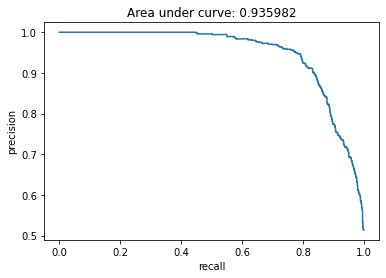

In [146]:
plt.plot(recall, precision)
plt.xlabel('recall');
plt.ylabel('precision');
plt.title(f'Area under curve: {rocauc}')